<a href="https://colab.research.google.com/github/NicoleBahamonMartinez/Taller-2-Ciencia-de-Datos-Aplicada/blob/main/Taller2_CienciaDatosAplicada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taller 2 - Ciencia de Datos Aplicada
### Nicole Bahamón Martínez
### Código: 201629594

# Instalación paquetes

In [49]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
from pandas_profiling import ProfileReport

# Lectura de los datos

In [53]:
# Loading the CSV file as dataframe
data_df = pd.read_csv('/content/Data_Taller_2.csv',delimiter=';')

In [54]:
# Showing dataframe dimensions
data_df.shape

(731, 12)

| **Field**  	| **Description**                                                  	|
|------------	|------------------------------------------------------------------	|
| Instant    	| Record Index                                                     	|
| Date       	| Date (Format: YYYY-MM-DD)                                        	|
| Season     	| Season of the year                                               	|
| Holiday    	| Is it holiday?                                                   	|
| Weather    	| Description of the weather situation                             	|
| Temp       	| Temperature in Celsius                                           	|
| Feel_Temp  	| Feeling temperature in Celsius                                   	|
| Hum        	| Normalized humidity                                              	|
| Wind       	| Wind speed in m/s                                                	|
| Casual     	| Count of casual users                                            	|
| Registered 	| Count of registered users                                        	|
| cnt        	| Count of total rental bikes including both casual and registered 	|

In [55]:
# Showing column types
data_df.dtypes

instant        int64
Date          object
Season        object
Holiday       object
Weather       object
Temp          object
Feel_Temp     object
Hum           object
Wind          object
Casual         int64
Registered     int64
cnt            int64
dtype: object

In [57]:
data_df['Temp']=data_df['Temp'].str.replace(',','.')
data_df['Feel_Temp']=data_df['Feel_Temp'].str.replace(',','.')
data_df['Hum']=data_df['Hum'].str.replace(',','.')
data_df['Wind']=data_df['Wind'].str.replace(',','.')

In [58]:
data_df['Temp']=pd.to_numeric(data_df['Temp'], downcast='float')
data_df['Feel_Temp']=pd.to_numeric(data_df['Feel_Temp'], downcast='float')
data_df['Hum']=pd.to_numeric(data_df['Hum'], downcast='float')
data_df['Wind']=pd.to_numeric(data_df['Wind'], downcast='float')

In [59]:
data_df.dtypes

instant         int64
Date           object
Season         object
Holiday        object
Weather        object
Temp          float32
Feel_Temp     float32
Hum           float32
Wind          float32
Casual          int64
Registered      int64
cnt             int64
dtype: object

In [60]:
# Showing first rows
data_df.head(10)

instant        Date    Season Holiday               Weather      Temp  \
0        1   1/01/2020  Springer      No         Mist + Cloudy  8.175849   
1        2   2/01/2020  Springer      No         Mist + Cloudy  9.083466   
2        3   3/01/2020  Springer      No            Few clouds  1.229108   
3        4   4/01/2020  Springer      No            Few clouds  1.400000   
4        5   5/01/2020  Springer      No      Partly    cloudy  2.666979   
5        6   6/01/2020  Springer      No                 Clear  1.604356   
6        7   7/01/2020  Springer      No                  Mist  1.236534   
7        8   8/01/2020  Springer      No  Mist + Broken clouds -0.245000   
8        9   9/01/2020  Springer      No         Partly cloudy -1.498349   
9       10  10/01/2020  Springer      No      Partly    cloudy -0.910849   

   Feel_Temp       Hum       Wind  Casual  Registered   cnt  
0   9.090375  0.805833  10.749882     331         654   985  
1   8.625733  0.696087 -16.652113     131         670   801  
2   0.902035  0.437273  16.636703     120        1229  1349  
3   1.969734  0.590435  10.739832     108        1454  1562  
4   2.775690  0.436957  12.522300      82        1518  1600  
5   2.960823  0.518261   6.000868      88        1518  1606  
6   1.815433  0.498696  11.304642     148        1362  1510  
7  -0.374062  0.535833  17.875868      68         891   959  
8  -2.539775  0.434167  24.250650      54         768   822  
9  -0.908264  0.482917  14.958889      41        1280  1321

# Verificación de datos únicos

In [61]:
data_df["Season"].unique()

array(['Springer', 'Summer', 'Fall', 'Winter'], dtype=object)

In [62]:
data_df["Holiday"].unique()

array(['No', 'Yes'], dtype=object)

In [63]:
data_df["Weather"].unique()

array(['Mist + Cloudy', 'Few clouds', ' Partly    cloudy', 'Clear',
       'Mist', 'Mist + Broken clouds', ' Partly cloudy',
       'Mist + Few clouds', 'Rain + Thunderstorm',
       'Light Rain + Scattered clouds', 'Snow'], dtype=object)

# Análisis exploratorio y calidad de datos

In [64]:
data_df.head()

instant       Date    Season Holiday            Weather      Temp  \
0        1  1/01/2020  Springer      No      Mist + Cloudy  8.175849   
1        2  2/01/2020  Springer      No      Mist + Cloudy  9.083466   
2        3  3/01/2020  Springer      No         Few clouds  1.229108   
3        4  4/01/2020  Springer      No         Few clouds  1.400000   
4        5  5/01/2020  Springer      No   Partly    cloudy  2.666979   

   Feel_Temp       Hum       Wind  Casual  Registered   cnt  
0   9.090375  0.805833  10.749882     331         654   985  
1   8.625733  0.696087 -16.652113     131         670   801  
2   0.902035  0.437273  16.636703     120        1229  1349  
3   1.969734  0.590435  10.739832     108        1454  1562  
4   2.775690  0.436957  12.522300      82        1518  1600

## Pandas Profiling

Pandas profiling nos da análisis exploratorio univariado no gráfico(medidas estadisticas), univariado gráfico (gráficas de distribución de las variables) y multivariado no gráfico(correlación)

In [65]:
profile = ProfileReport(data_df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Univariado no gráfico

### Variables categóricas:
Tabla de frecuencias - Moda


In [66]:
data_df.Season.value_counts()
# Moda: Otoño

Fall        188
Summer      184
Springer    181
Winter      178
Name: Season, dtype: int64

In [67]:
data_df.Weather.value_counts()
# Moda: Partly Cloudy

 Partly    cloudy                128
Few clouds                       118
Clear                            111
 Partly cloudy                   106
Mist + Broken clouds              69
Mist + Cloudy                     66
Mist + Few clouds                 58
Mist                              54
Light Rain + Scattered clouds      8
Rain + Thunderstorm                7
Snow                               6
Name: Weather, dtype: int64

In [68]:
data_df.Holiday.value_counts()
# Moda: No

No     710
Yes     21
Name: Holiday, dtype: int64

### Variables cuantitativas
- Cantidad
- Media
- Desviación estandar
- Valores mínimos y máximos
- Cuartiles
- Mediana

In [69]:
data_df.describe()

instant        Temp   Feel_Temp         Hum        Wind  \
count  731.000000  727.000000  731.000000  731.000000  731.000000   
mean   366.000000   15.271063   14.294639    0.682614   12.668792   
std    211.165812    8.595965    7.659175    0.750679    5.417463   
min      1.000000   -5.220871   -4.283729    0.000000  -16.652113   
25%    183.500000    7.842925    7.878597    0.522291    9.000746   
50%    366.000000   15.421651   14.876451    0.629167   12.124789   
75%    548.500000   22.785000   20.604294    0.732709   15.624802   
max    731.000000   32.498348   31.522112   10.867083   34.000023   

            Casual   Registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [70]:
cuantitative_features = ['Temp' , 'Feel_Temp',	'Hum',	'Wind'	,'Casual',	'Registered'	,'cnt']
for col in data_df.columns:
  if col in cuantitative_features:
    print(col+':',data_df[col].median())


Temp: 15.421651
Feel_Temp: 14.876451
Hum: 0.629167
Wind: 12.124789
Casual: 713.0
Registered: 3662.0
cnt: 4548.0


## Univariado gráfico

### Variables Cuantitativas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c00e6fcd0>,
      dtype=object)

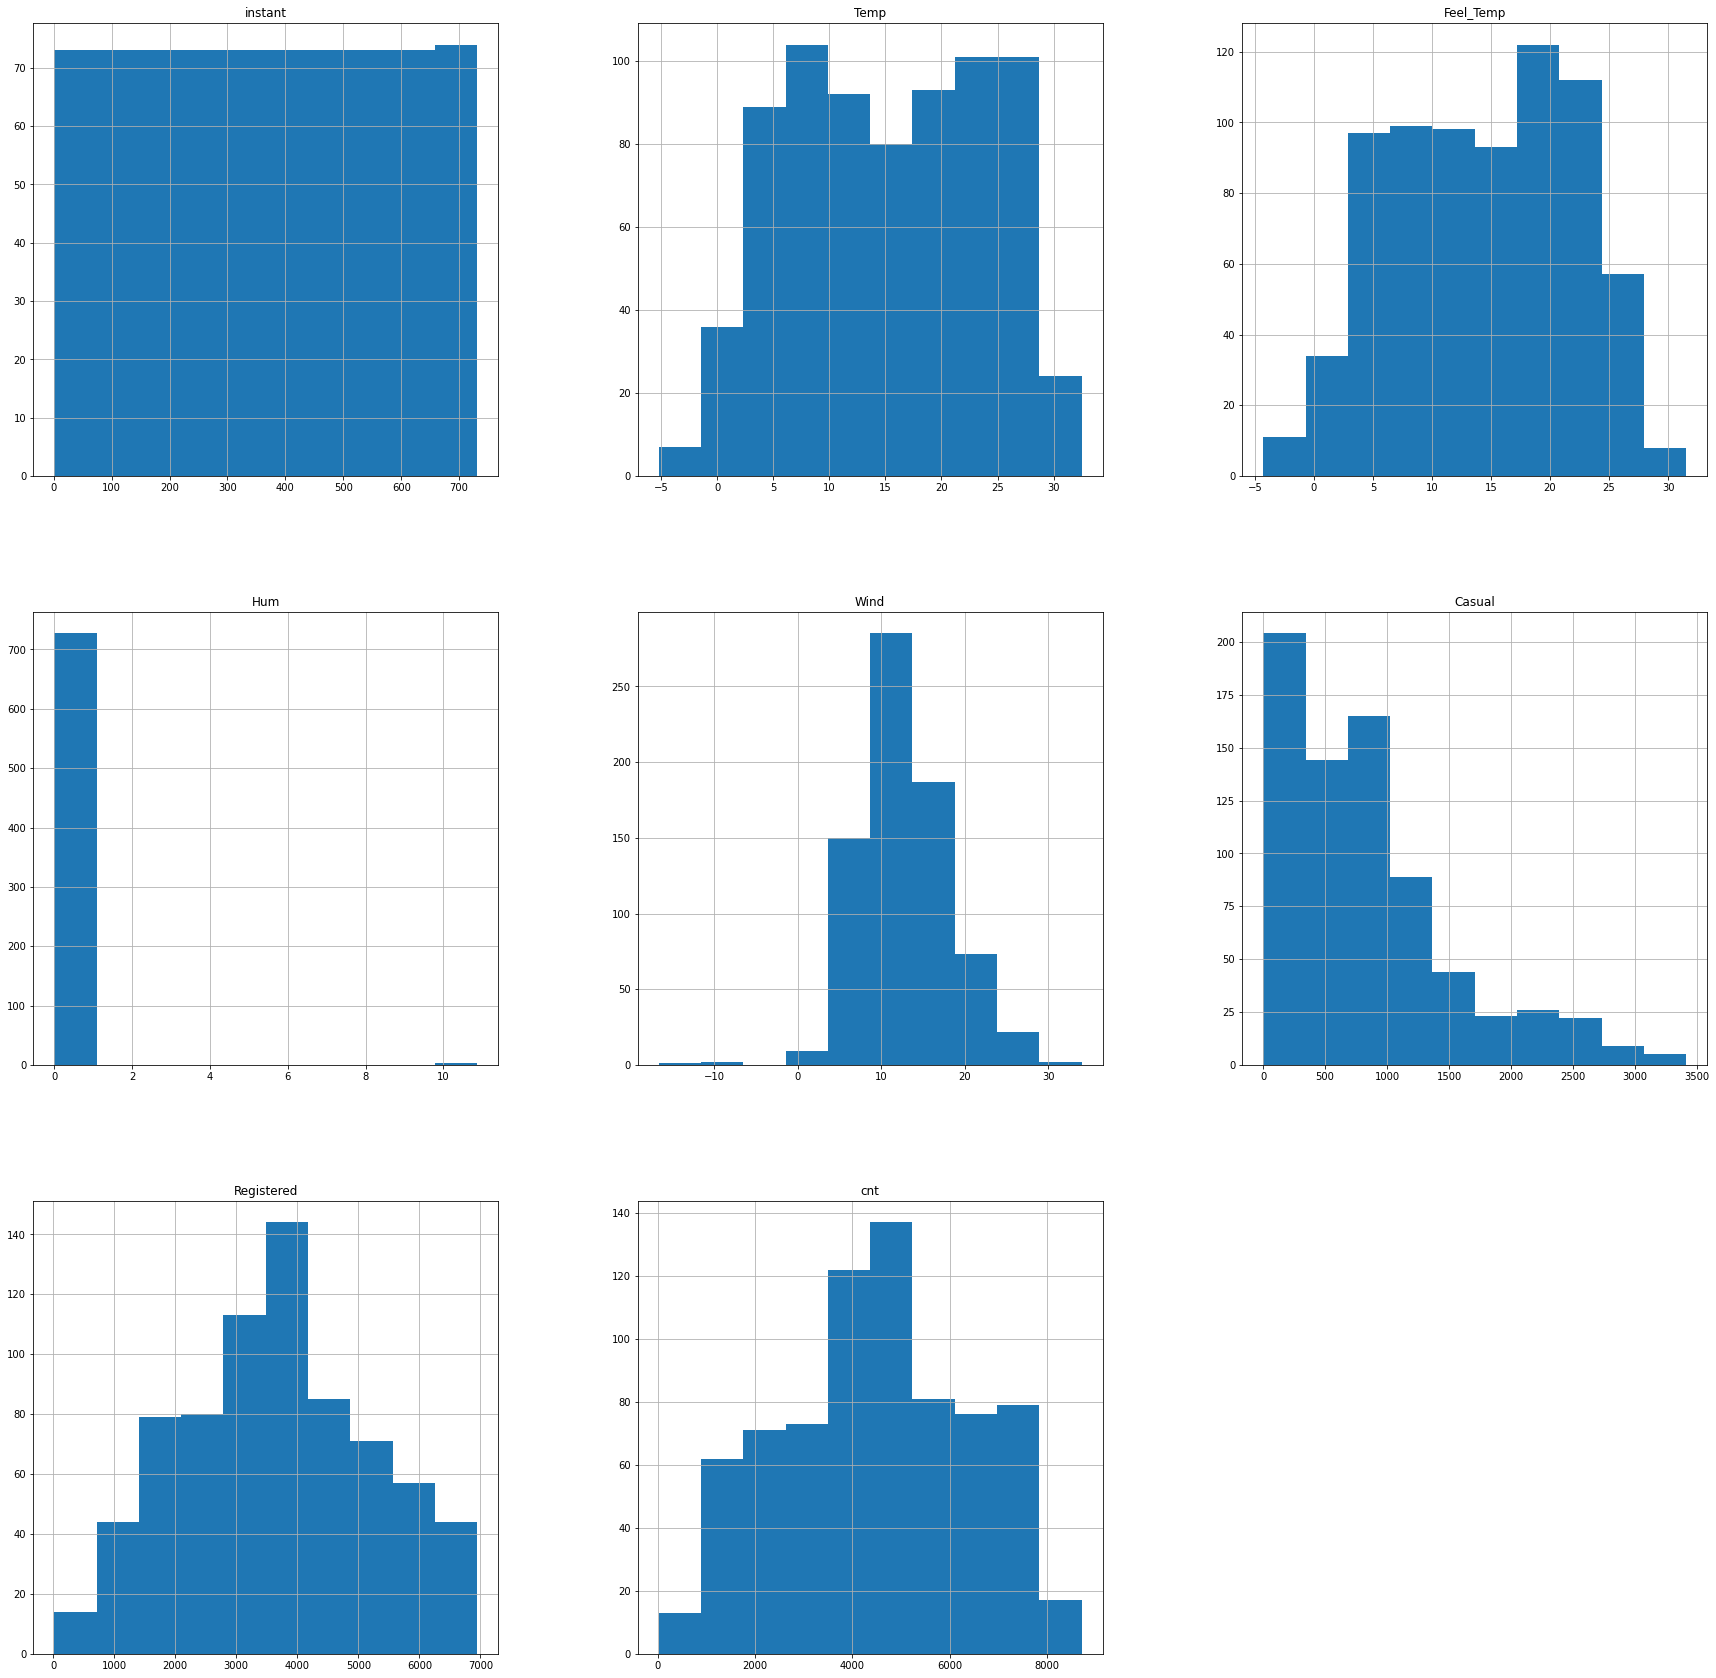

In [72]:
data_df.hist(figsize=(30,30))

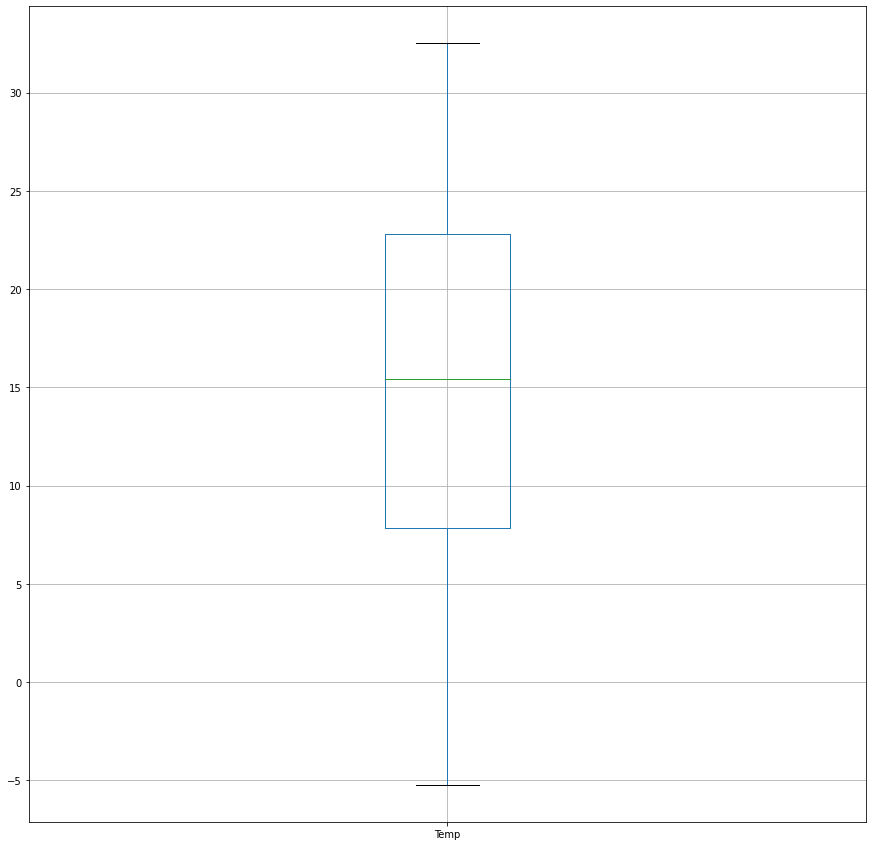

In [73]:
data_df.boxplot(column=['Temp'], figsize=(15,15))

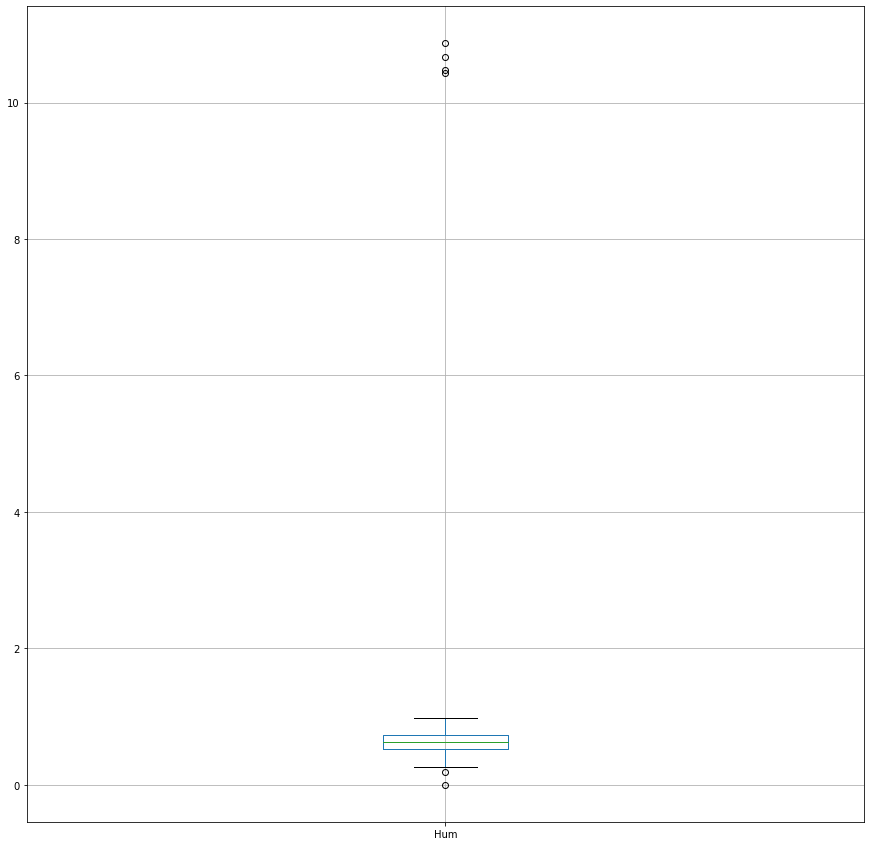

In [75]:
data_df.boxplot(column=['Hum'], figsize=(15,15))

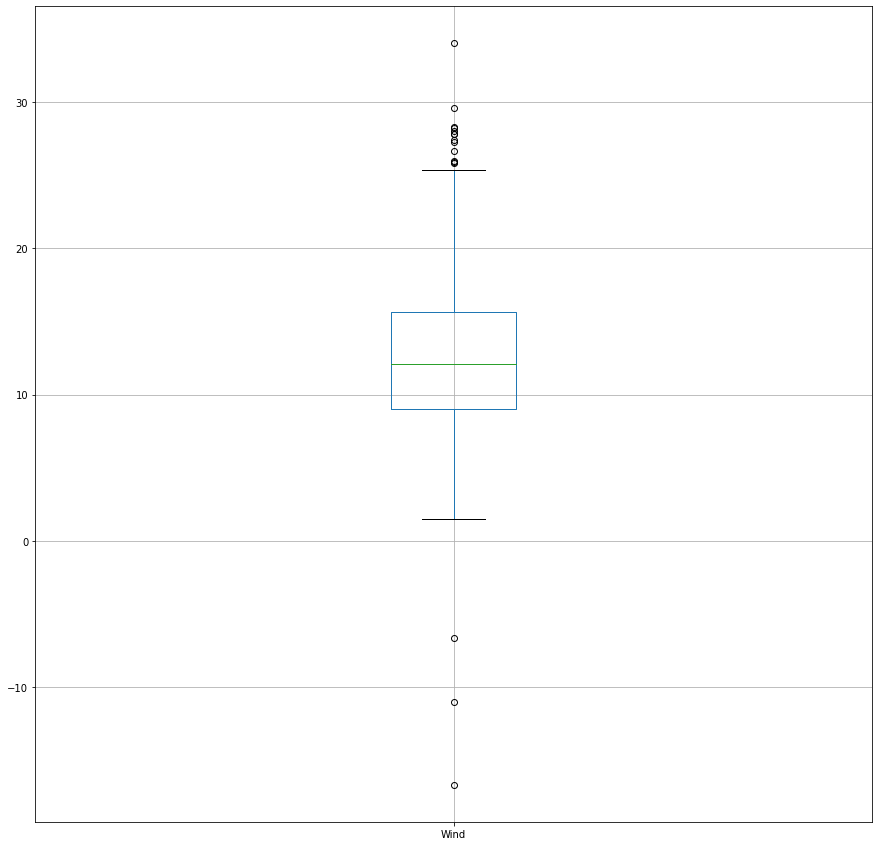

In [76]:
data_df.boxplot(column=['Wind'], figsize=(15,15))

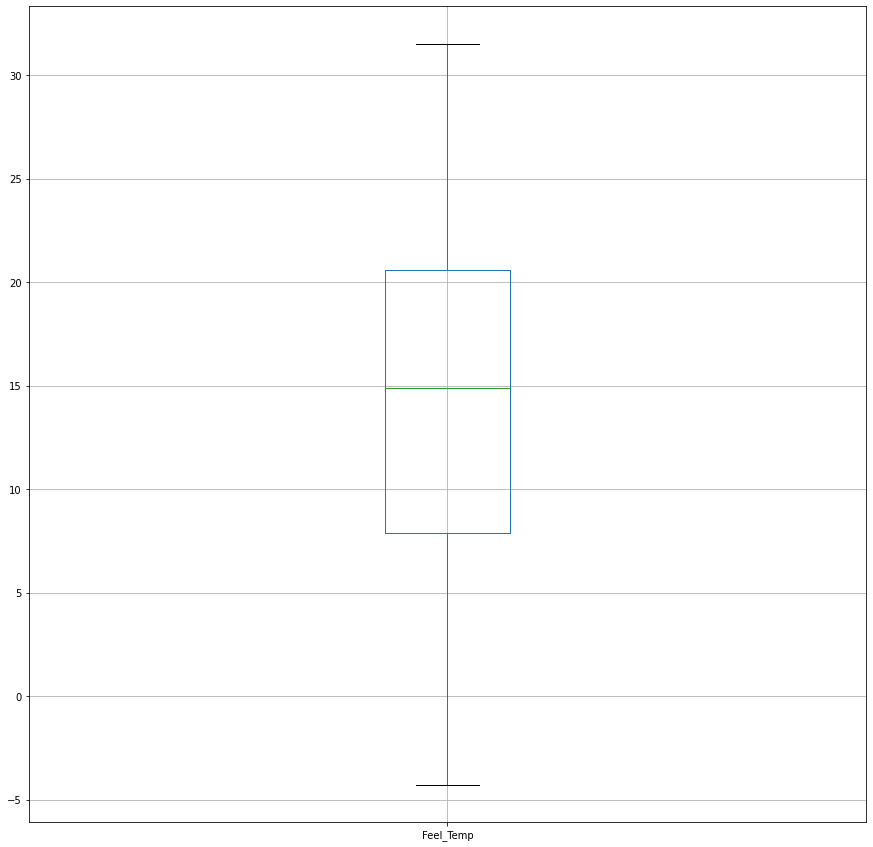

In [74]:
data_df.boxplot(column=['Feel_Temp'], figsize=(15,15))

### Variables categóricas

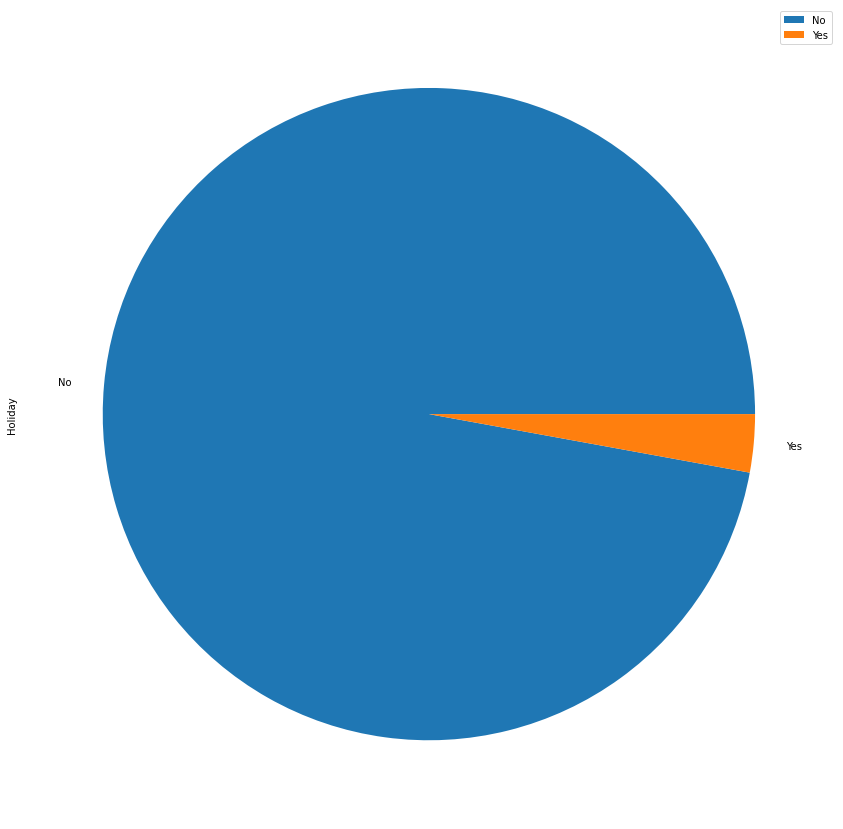

In [77]:
fig, ax = plt.subplots()
data_df['Holiday'].value_counts().plot(ax=ax, kind='pie',legend=True, figsize=(15,15))

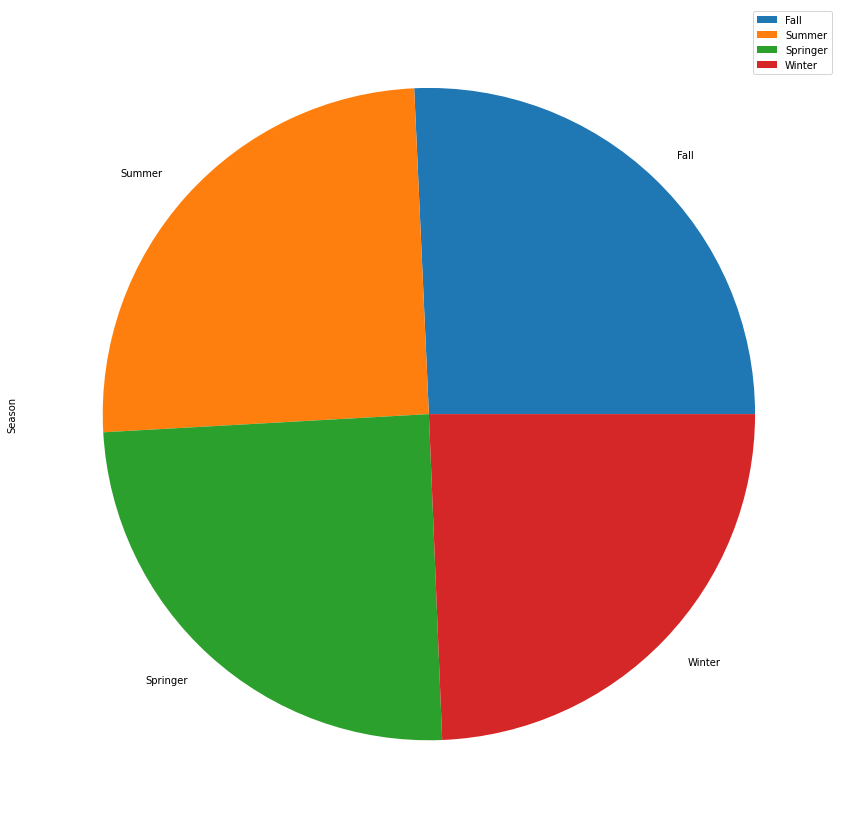

In [78]:
fig, ax = plt.subplots()
data_df['Season'].value_counts().plot(ax=ax, kind='pie',legend=True, figsize=(15,15))

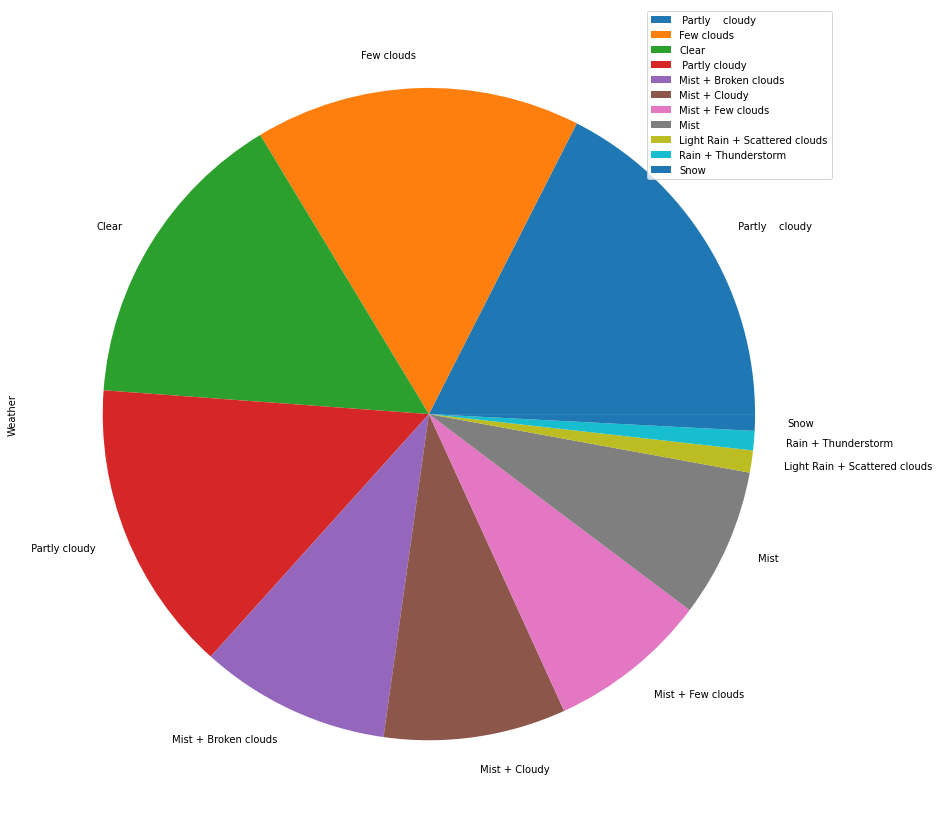

In [80]:
fig, ax = plt.subplots()
data_df['Weather'].value_counts().plot(ax=ax, kind='pie',legend=True, figsize=(15,15))

## Multivariado Gráfico

Text(0, 0.5, 'Estación')

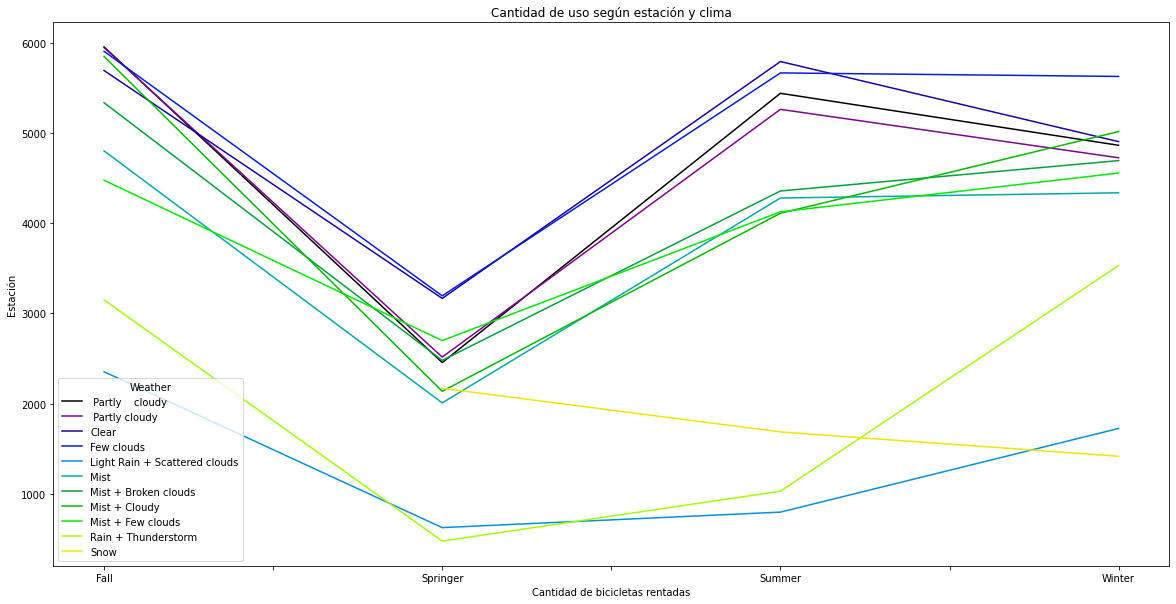

In [82]:
colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
ax=(data_df.groupby(["Weather",'Season'])
   ['cnt'].mean().unstack("Weather").plot(kind = 'line', title='Cantidad de uso según estación y clima',figsize=(20, 10),color=[colormap(i) for i in np.linspace(0, 1,15)]))
ax.set_xlabel('Cantidad de bicicletas rentadas')
ax.set_ylabel('Estación')


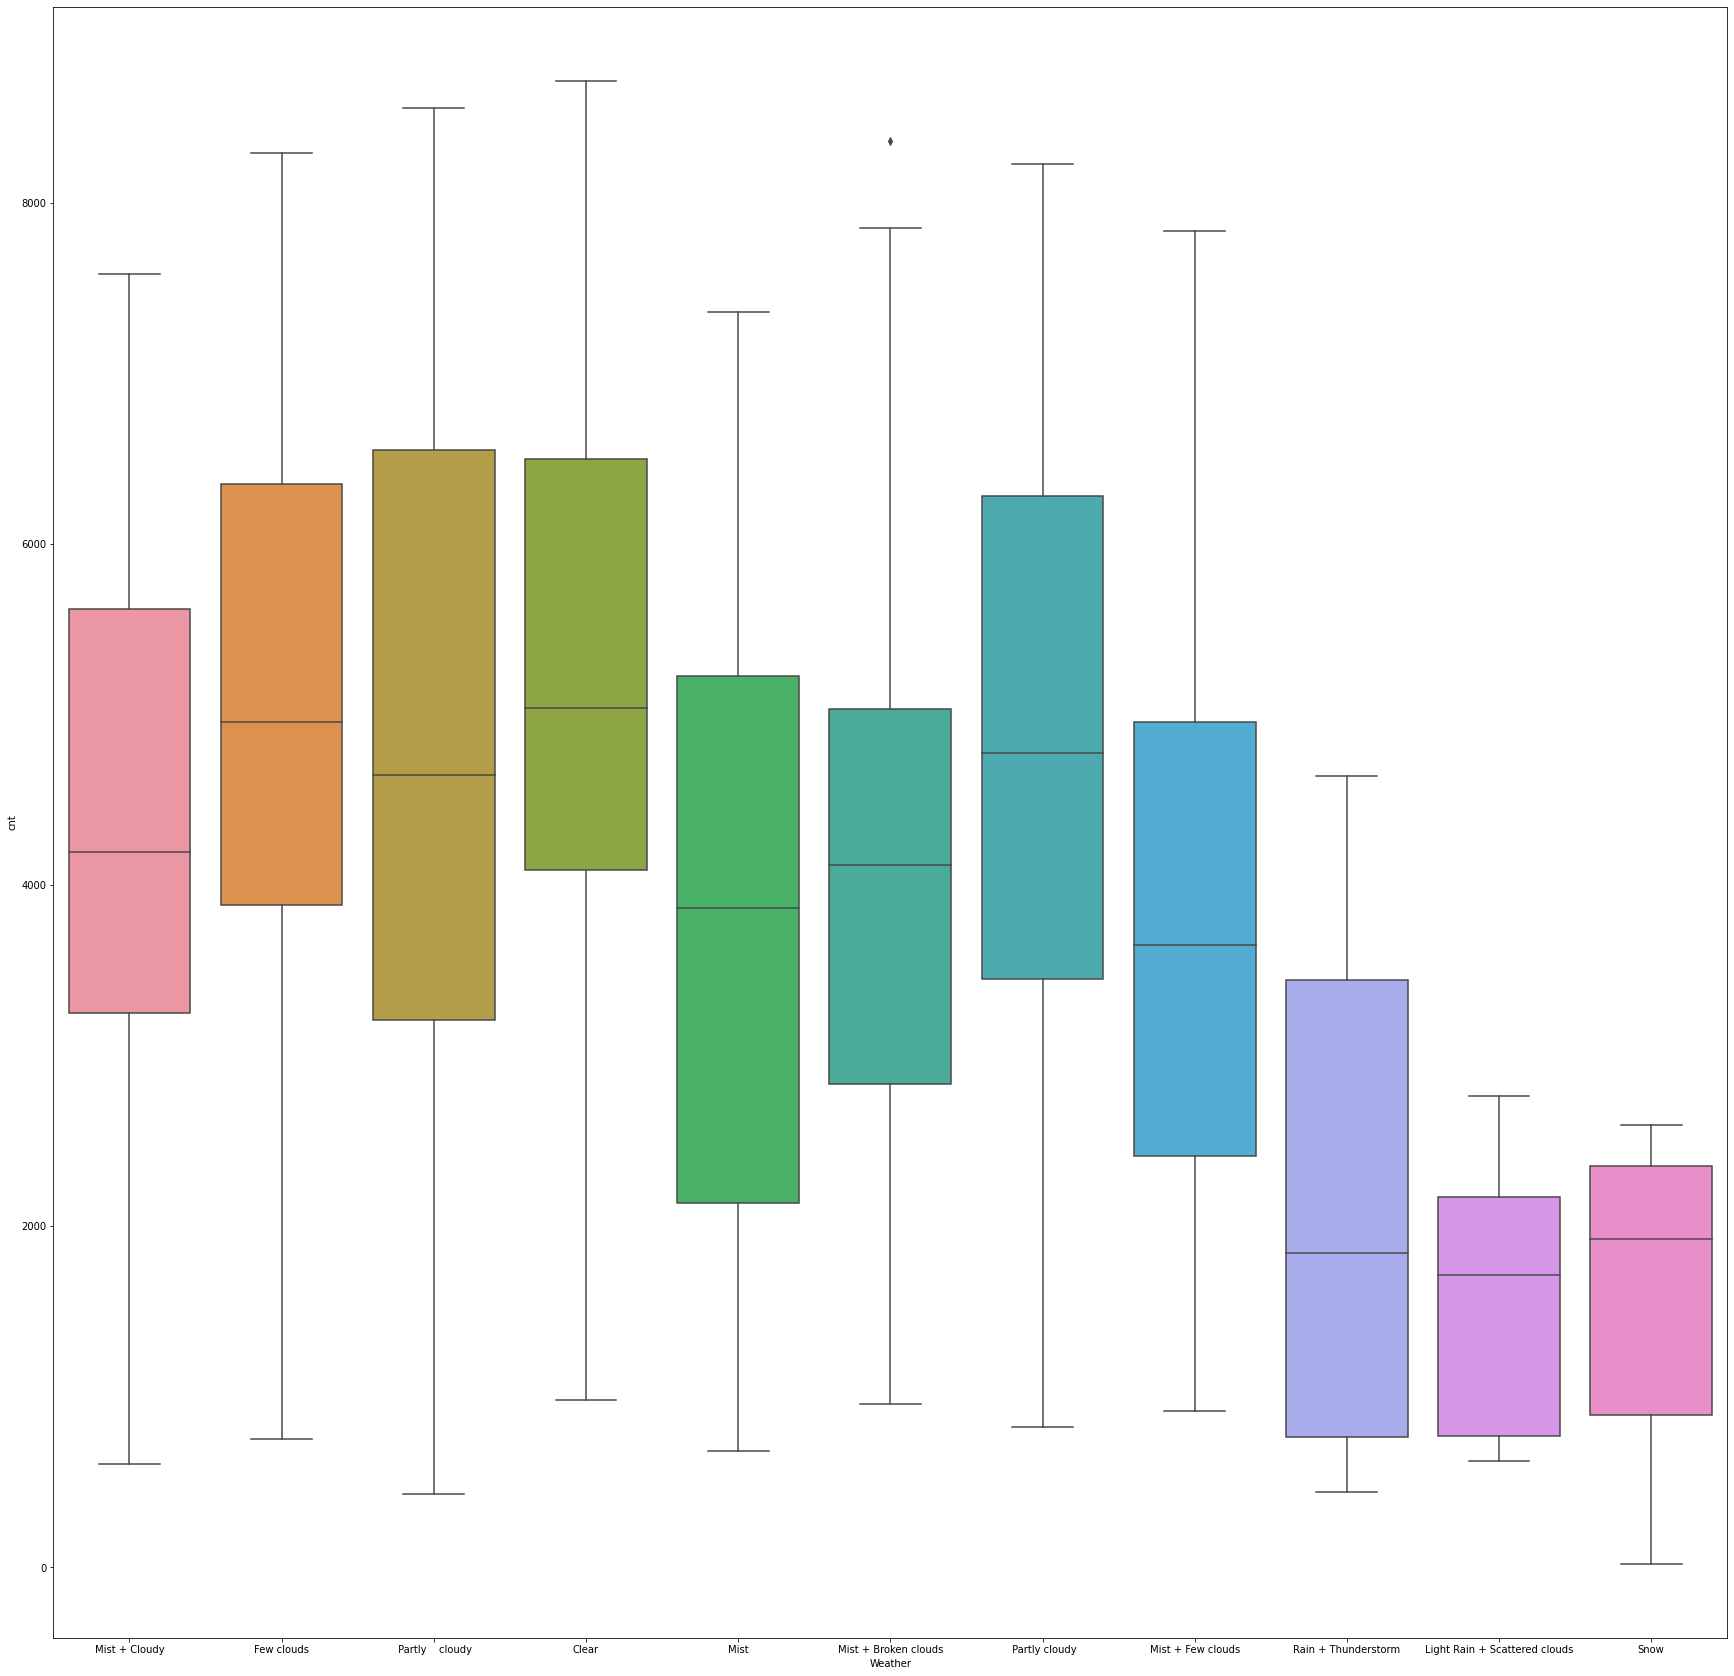

In [90]:
plt.figure(figsize =(30,30))
sns.boxplot(x = 'Weather', y = 'cnt', data = data_df)

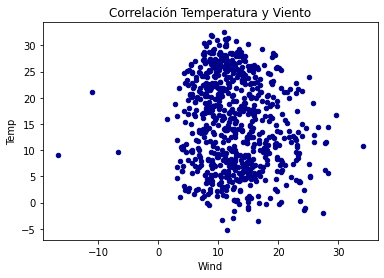

In [85]:
ax1 = data_df.plot.scatter(x='Wind',y='Temp',c='DarkBlue',title='Correlación Temperatura y Viento')

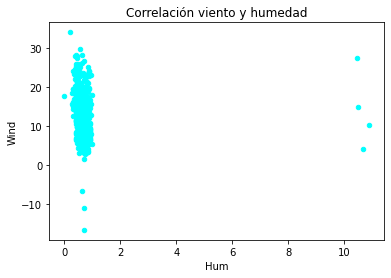

In [87]:
ax1 = data_df.plot.scatter(x='Hum',y='Wind',c='cyan',title='Correlación viento y humedad')

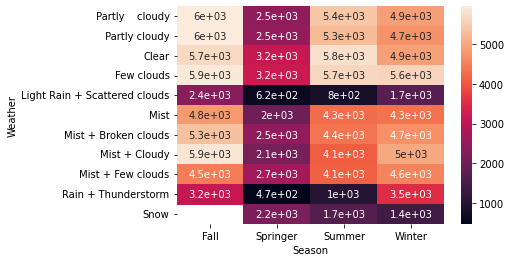

In [88]:
df_heatmap = data_df.pivot_table(values='cnt',index='Weather',columns='Season',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=True)
plt.show()

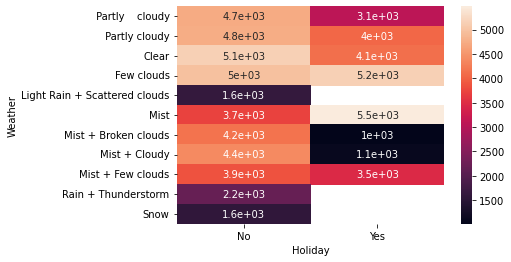

In [89]:
df_heatmap = data_df.pivot_table(values='cnt',index='Weather',columns='Holiday',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=True)
plt.show()

## Multivariado No Gráfico

In [91]:
data_df.head()

instant       Date    Season Holiday            Weather      Temp  \
0        1  1/01/2020  Springer      No      Mist + Cloudy  8.175849   
1        2  2/01/2020  Springer      No      Mist + Cloudy  9.083466   
2        3  3/01/2020  Springer      No         Few clouds  1.229108   
3        4  4/01/2020  Springer      No         Few clouds  1.400000   
4        5  5/01/2020  Springer      No   Partly    cloudy  2.666979   

   Feel_Temp       Hum       Wind  Casual  Registered   cnt  
0   9.090375  0.805833  10.749882     331         654   985  
1   8.625733  0.696087 -16.652113     131         670   801  
2   0.902035  0.437273  16.636703     120        1229  1349  
3   1.969734  0.590435  10.739832     108        1454  1562  
4   2.775690  0.436957  12.522300      82        1518  1600

In [92]:
features = ['instant', 'Temp', 'Feel_Temp', 'Hum','Wind','Casual','Registered']
data_df[features + ['cnt']].corr()

instant      Temp  Feel_Temp       Hum      Wind    Casual  \
instant     1.000000  0.153150   0.152638  0.018403 -0.099976  0.275255   
Temp        0.153150  1.000000   0.991676 -0.000657 -0.144078  0.544182   
Feel_Temp   0.152638  0.991676   1.000000 -0.021285 -0.171659  0.543864   
Hum         0.018403 -0.000657  -0.021285  1.000000 -0.026731 -0.008490   
Wind       -0.099976 -0.144078  -0.171659 -0.026731  1.000000 -0.154652   
Casual      0.275255  0.544182   0.543864 -0.008490 -0.154652  1.000000   
Registered  0.659623  0.538763   0.544192 -0.055816 -0.197764  0.395282   
cnt         0.628830  0.626900   0.631066 -0.047965 -0.214097  0.672804   

            Registered       cnt  
instant       0.659623  0.628830  
Temp          0.538763  0.626900  
Feel_Temp     0.544192  0.631066  
Hum          -0.055816 -0.047965  
Wind         -0.197764 -0.214097  
Casual        0.395282  0.672804  
Registered    1.000000  0.945517  
cnt           0.945517  1.000000

In [94]:
my_crosstab = pd.crosstab(index=data_df['Weather'], 
                            columns=data_df['Season'],
                             margins=True)   # Include row and column totals
my_crosstab

Season                         Fall  Springer  Summer  Winter  All
Weather                                                           
 Partly    cloudy                39        34      27      28  128
 Partly cloudy                   33        25      28      20  106
Clear                            35        17      30      29  111
Few clouds                       29        35      28      26  118
Light Rain + Scattered clouds     2         1       1       4    8
Mist                             10        15      14      15   54
Mist + Broken clouds              9        17      24      19   69
Mist + Cloudy                    18        15      18      15   66
Mist + Few clouds                11        19      12      16   58
Rain + Thunderstorm               2         2       1       2    7
Snow                              0         1       1       4    6
All                             188       181     184     178  731

In [95]:
my_crosstab = pd.crosstab(index=data_df['Weather'], 
                            columns=data_df['Holiday'],
                             margins=True)   # Include row and column totals
my_crosstab

Holiday                         No  Yes  All
Weather                                     
 Partly    cloudy              123    5  128
 Partly cloudy                 102    4  106
Clear                          109    2  111
Few clouds                     114    4  118
Light Rain + Scattered clouds    8    0    8
Mist                            53    1   54
Mist + Broken clouds            68    1   69
Mist + Cloudy                   65    1   66
Mist + Few clouds               55    3   58
Rain + Thunderstorm              7    0    7
Snow                             6    0    6
All                            710   21  731

In [96]:
my_crosstab = pd.crosstab(index=data_df['Holiday'], 
                            columns=data_df['Season'],
                             margins=True)   # Include row and column totals
my_crosstab

Season   Fall  Springer  Summer  Winter  All
Holiday                                     
No        184       174     180     172  710
Yes         4         7       4       6   21
All       188       181     184     178  731

# Limpieza de datos

In [98]:
data_df.head()

Date    Season Holiday            Weather      Temp  Feel_Temp  \
0  1/01/2020  Springer      No      Mist + Cloudy  8.175849   9.090375   
1  2/01/2020  Springer      No      Mist + Cloudy  9.083466   8.625733   
2  3/01/2020  Springer      No         Few clouds  1.229108   0.902035   
3  4/01/2020  Springer      No         Few clouds  1.400000   1.969734   
4  5/01/2020  Springer      No   Partly    cloudy  2.666979   2.775690   

        Hum       Wind  Casual  Registered   cnt  
0  0.805833  10.749882     331         654   985  
1  0.696087 -16.652113     131         670   801  
2  0.437273  16.636703     120        1229  1349  
3  0.590435  10.739832     108        1454  1562  
4  0.436957  12.522300      82        1518  1600

In [100]:
# Se borra la variable instant, debido a que esta es única para cada record y no aporta al modelo
data_df = data_df.drop(labels=["instant"], axis=1)
# Se borran las variables con alta correlación registered y casual: Se deja unicamente cnt como variable objetivo. De igual manera se deja solo feel_temp
data_df = data_df.drop(labels=["Temp","Casual","Registered"], axis=1)

In [110]:
data_df['Date'] = pd.to_datetime(data_df['Date'],format='%d/%m/%Y', errors='coerce')

In [111]:
# Creamos columnas nuevas para tomar el día y el mes de la fecha. Eliminamos la columna fecha que tiene mucha cardinalidad
data_df['Dia'] = data_df.Date.dt.day_name()
data_df['Mes'] = data_df.Date.dt.month_name()
data_df = data_df.drop(['Date'], axis = 1).dropna()

In [112]:
data_df.head()

Season Holiday            Weather  Feel_Temp       Hum       Wind   cnt  \
0  Springer      No      Mist + Cloudy   9.090375  0.805833  10.749882   985   
1  Springer      No      Mist + Cloudy   8.625733  0.696087 -16.652113   801   
2  Springer      No         Few clouds   0.902035  0.437273  16.636703  1349   
3  Springer      No         Few clouds   1.969734  0.590435  10.739832  1562   
4  Springer      No   Partly    cloudy   2.775690  0.436957  12.522300  1600   

         Dia      Mes  
0  Wednesday  January  
1   Thursday  January  
2     Friday  January  
3   Saturday  January  
4     Sunday  January

In [114]:
def cluster_weather(weather):
  if (weather.__contains__('Mist')):
    return 'Mist'
  elif (weather.__contains__('Rain ')):
    return 'Rain'
  else:
    return 'Other'

In [115]:
# Se hace cluster del clima según lo indicado por el meteorologo
data_df['Weather'] = data_df['Weather'].apply(cluster_weather)

In [116]:
data_df["Weather"].unique()

array(['Mist', 'Other', 'Rain'], dtype=object)

In [113]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [117]:
# Binarizar variable Holiday
df_one = pd.get_dummies(data_df["Holiday"]) 
  
data_df = pd.concat((df_one, data_df), axis=1) 
data_df = data_df.drop(["Holiday"], axis=1) 
data_df = data_df.drop(["Yes"], axis=1) 
data_df = data_df.rename(columns={"No": "Holiday"}) 

In [130]:
data_df.head()

Holiday    Season Weather  Feel_Temp       Hum       Wind   cnt        Dia  \
0        1  Springer    Mist   9.090375  0.805833  10.749882   985  Wednesday   
1        1  Springer    Mist   8.625733  0.696087 -16.652113   801   Thursday   
2        1  Springer   Other   0.902035  0.437273  16.636703  1349     Friday   
3        1  Springer   Other   1.969734  0.590435  10.739832  1562   Saturday   
4        1  Springer   Other   2.775690  0.436957  12.522300  1600     Sunday   

       Mes  
0  January  
1  January  
2  January  
3  January  
4  January

In [132]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(data_df[['Season']])
data_df[ohe.categories_[0]] = transformed.toarray()

In [134]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(data_df[['Weather']])
data_df[ohe.categories_[0]] = transformed.toarray()

In [135]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(data_df[['Dia']])
data_df[ohe.categories_[0]] = transformed.toarray()

In [136]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(data_df[['Mes']])
data_df[ohe.categories_[0]] = transformed.toarray()

In [138]:
data_df = data_df.drop(labels=['Season','Dia','Mes','Weather'], axis=1)

In [139]:
data_df

Holiday  Feel_Temp       Hum       Wind   cnt  Fall  Springer  Summer  \
0          1   9.090375  0.805833  10.749882   985   0.0       1.0     0.0   
1          1   8.625733  0.696087 -16.652113   801   0.0       1.0     0.0   
2          1   0.902035  0.437273  16.636703  1349   0.0       1.0     0.0   
3          1   1.969734  0.590435  10.739832  1562   0.0       1.0     0.0   
4          1   2.775690  0.436957  12.522300  1600   0.0       1.0     0.0   
..       ...        ...       ...        ...   ...   ...       ...     ...   
726        1   2.652174  0.652917  23.458912  2114   0.0       1.0     0.0   
727        1   3.987162  0.590000  10.416557  3095   0.0       1.0     0.0   
728        1   3.392800  0.752917   8.333661  1341   0.0       1.0     0.0   
729        1   2.889900  0.483333  23.500519  1796   0.0       1.0     0.0   
730        1   2.503889  0.577500  10.374682  2729   0.0       1.0     0.0   

     Winter  Mist  ...  December  February  January  July  June  March  May  \
0       0.0   1.0  ...       0.0       0.0      1.0   0.0   0.0    0.0  0.0   
1       0.0   1.0  ...       0.0       0.0      1.0   0.0   0.0    0.0  0.0   
2       0.0   0.0  ...       0.0       0.0      1.0   0.0   0.0    0.0  0.0   
3       0.0   0.0  ...       0.0       0.0      1.0   0.0   0.0    0.0  0.0   
4       0.0   0.0  ...       0.0       0.0      1.0   0.0   0.0    0.0  0.0   
..      ...   ...  ...       ...       ...      ...   ...   ...    ...  ...   
726     0.0   1.0  ...       1.0       0.0      0.0   0.0   0.0    0.0  0.0   
727     0.0   1.0  ...       1.0       0.0      0.0   0.0   0.0    0.0  0.0   
728     0.0   1.0  ...       1.0       0.0      0.0   0.0   0.0    0.0  0.0   
729     0.0   0.0  ...       1.0       0.0      0.0   0.0   0.0    0.0  0.0   
730     0.0   1.0  ...       1.0       0.0      0.0   0.0   0.0    0.0  0.0   

     November  October  September  
0         0.0      0.0        0.0  
1         0.0      0.0        0.0  
2         0.0      0.0        0.0  
3         0.0      0.0        0.0  
4         0.0      0.0        0.0  
..        ...      ...        ...  
726       0.0      0.0        0.0  
727       0.0      0.0        0.0  
728       0.0      0.0        0.0  
729       0.0      0.0        0.0  
730       0.0      0.0        0.0  

[730 rows x 31 columns]

# Modelos

In [141]:
# Division de data train y test
features = ['Holiday',
'Feel_Temp',
'Hum',
'Wind',
'Fall',
'Springer',
'Summer',
'Winter',
'Mist',
'Other',
'Rain',
'Friday',
'Monday',
'Saturday',
'Sunday',
'Thursday',
'Tuesday',
'Wednesday',
'April',
'August',
'December',
'February',
'January',
'July',
'June',
'March',
'May',
'November',
'October',
'September']
X = data_df[features]
Y = data_df['cnt']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

## Scaling Features


In [142]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear model

In [143]:
regr = LinearRegression()
regr.fit(X_train_scaled, Y_train)

LinearRegression()

In [144]:
importance = regr.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 74.32840
Feature: 1, Score: 856.01610
Feature: 2, Score: -36.74554
Feature: 3, Score: -146.12381
Feature: 4, Score: -221262701677138.09375
Feature: 5, Score: -211691625387970.90625
Feature: 6, Score: -220799442866006.37500
Feature: 7, Score: -215411522165312.68750
Feature: 8, Score: -1193139528611303.00000
Feature: 9, Score: -1212255384294623.00000
Feature: 10, Score: -374703126208809.68750
Feature: 11, Score: -1073975236975278.87500
Feature: 12, Score: -1057539555463796.50000
Feature: 13, Score: -1089934138694205.50000
Feature: 14, Score: -1084666168319012.37500
Feature: 15, Score: -1089934138694185.50000
Feature: 16, Score: -1079346789039962.12500
Feature: 17, Score: -1057539555463726.37500
Feature: 18, Score: 221659625755706.81250
Feature: 19, Score: 215645756572728.78125
Feature: 20, Score: 207234053192849.31250
Feature: 21, Score: 209381613693315.81250
Feature: 22, Score: 215645756572684.75000
Feature: 23, Score: 227443074723420.81250
Feature: 24, Score: 2176771

In [145]:
regr.intercept_

4548.061357964067

### Evaluation of Linear Model

In [146]:
preds_train = regr.predict(X_train_scaled)
preds_test = regr.predict(X_test_scaled)

In [147]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(1143.7742226424716, 1151.234664772988)

In [148]:
np.sqrt(mean_squared_error(Y_train, preds_train)), np.sqrt(mean_squared_error(Y_test, preds_test))

(1323.864473873516, 1303.1426469168464)

Se encuentra que tanto el error de entrenamiento y el error de test son altos. Alcanzando valores de 1300 que es alrededor de un tercio del valor promedio de la variable. Lo anterior nos indica que hay un problema de sub ajuste del modelo.

In [149]:
(Y_test - preds_test).describe(percentiles = [.25, .5, .75, .95, .99])

count     146.000000
mean       -6.710866
std      1307.611182
min     -3083.311358
25%     -1037.936358
50%      -221.045733
75%      1243.407392
95%      1878.204267
99%      2193.188642
max      2519.938642
Name: cnt, dtype: float64

In [150]:
worst_condition = np.where((Y_test - preds_test) > -0.5, True, False)

In [151]:
worst_cases = pd.concat([
    X_test.loc[worst_condition],
    Y_test.loc[worst_condition]
], axis = 1).reset_index(drop = True)

In [152]:
worst_cases['predictions'] = pd.Series(preds_test).loc[worst_condition].reset_index(drop = True)

In [153]:
worst_cases

Holiday  Feel_Temp       Hum       Wind  Fall  Springer  Summer  Winter  \
0         1  16.214399  0.886957  23.044182   1.0       0.0     0.0     0.0   
1         1  16.924288  0.641667   6.334569   0.0       0.0     0.0     1.0   
2         1  22.146975  0.697083  14.416457   0.0       0.0     1.0     0.0   
3         1   5.233461  0.552083  13.374875   0.0       0.0     0.0     1.0   
4         0  23.927099  0.676250  13.166907   0.0       0.0     1.0     0.0   
..      ...        ...       ...        ...   ...       ...     ...     ...   
66        1   4.936938  0.443333  27.833742   0.0       1.0     0.0     0.0   
67        1  20.574825  0.690833   9.000914   0.0       0.0     0.0     1.0   
68        1  22.206713  0.732500  13.332464   0.0       0.0     1.0     0.0   
69        1   7.933188  0.535417   3.125550   0.0       0.0     0.0     1.0   
70        1  20.722500  0.582083  22.999693   0.0       0.0     1.0     0.0   

    Mist  Other  ...  January  July  June  March  May  November  October  \
0    0.0    0.0  ...      0.0   0.0   0.0    0.0  0.0       0.0      0.0   
1    0.0    1.0  ...      0.0   0.0   0.0    0.0  0.0       0.0      1.0   
2    0.0    1.0  ...      0.0   0.0   0.0    0.0  1.0       0.0      0.0   
3    0.0    1.0  ...      0.0   0.0   0.0    0.0  0.0       1.0      0.0   
4    0.0    1.0  ...      0.0   0.0   0.0    0.0  1.0       0.0      0.0   
..   ...    ...  ...      ...   ...   ...    ...  ...       ...      ...   
66   0.0    1.0  ...      1.0   0.0   0.0    0.0  0.0       0.0      0.0   
67   1.0    0.0  ...      0.0   0.0   0.0    0.0  0.0       0.0      0.0   
68   0.0    1.0  ...      0.0   0.0   0.0    0.0  1.0       0.0      0.0   
69   0.0    1.0  ...      0.0   0.0   0.0    0.0  0.0       1.0      0.0   
70   0.0    1.0  ...      0.0   0.0   1.0    0.0  0.0       0.0      0.0   

    September   cnt  predictions  
0         1.0  2710  2615.311358  
1         0.0  7466  5732.936358  
2         0.0  6591  5807.858233  
3         0.0  5495  4186.858233  
4         0.0  6043  5556.858233  
..        ...   ...          ...  
66        0.0  3376  2218.920733  
67        1.0  7393  6136.811358  
68        0.0  6536  6175.108233  
69        0.0  5087  4387.983233  
70        0.0  7421  5654.451983  

[71 rows x 32 columns]

Se encuentran más de 71 peores casos. Lo anterior nos sigue indicando que el modelo no se está ajustando bien a los datos

Debido a que es un problema de sub ajuste debemos aumentar la complejidad del modelo. Por lo cual se decide usar regresión polinomial

## Polinomial model 2 degrees

In [154]:
from sklearn.preprocessing import PolynomialFeatures
X = data_df[features]
Poly_Features = PolynomialFeatures(degree=2, include_bias = False)
X_Poly = Poly_Features.fit_transform(X)
Y = data_df['cnt']
X_train, X_test, Y_train, Y_test = train_test_split(X_Poly, Y, test_size = 0.2, random_state = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
regr_2 = LinearRegression()
regr_2.fit(X_train_scaled, Y_train)


LinearRegression()

In [155]:
importance = regr_2.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -29037693551021880.00000
Feature: 1, Score: -27176862414530316.00000
Feature: 2, Score: 2572953133210438.00000
Feature: 3, Score: 1075024736612331.00000
Feature: 4, Score: 31230751315999736.00000
Feature: 5, Score: 3966230053852287.00000
Feature: 6, Score: 2144065364384018.50000
Feature: 7, Score: 11154550076390066.00000
Feature: 8, Score: 24753860195176636.00000
Feature: 9, Score: 751511086295820.75000
Feature: 10, Score: 3042864513362720.00000
Feature: 11, Score: -4088572766849855.00000
Feature: 12, Score: -1865835103596086.00000
Feature: 13, Score: -6286162444627990.00000
Feature: 14, Score: 4896416208962172.00000
Feature: 15, Score: 14159765463318004.00000
Feature: 16, Score: -11949887934375274.00000
Feature: 17, Score: 11179639372613374.00000
Feature: 18, Score: 2141007659076.75000
Feature: 19, Score: -8842377871530875.00000
Feature: 20, Score: 8879181639093831.00000
Feature: 21, Score: 16720131401045490.00000
Feature: 22, Score: -15657381171674216.00000
Feature

In [156]:
regr_2.intercept_

4517.604766655276

### Evaluation of Linear Model

In [157]:
preds_train = regr_2.predict(X_train_scaled)
preds_test = regr_2.predict(X_test_scaled)

In [158]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(722.9037954343361, 654821122102333.0)

In [159]:
np.sqrt(mean_squared_error(Y_train, preds_train)), np.sqrt(mean_squared_error(Y_test, preds_test))

(894.6206722578645, 3178488826360110.5)

El error se reduce en entrenamiento pero aumenta considerablemente en el set de prueba. Lo que nos indica que llegamos a un caso de Overfitting

## Polinomial model 3 degrees

In [ ]:
X = data_df[features]
Poly_Features = PolynomialFeatures(degree=3, include_bias = False)
X_Poly = Poly_Features.fit_transform(X)
Y = data_df['cnt']
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_Poly, Y, test_size = 0.2, random_state = 1)
scaler = StandardScaler()
X_train_scaled_3 = scaler.fit_transform(X_train)
X_test_scaled_3 = scaler.transform(X_test)
regr_3 = LinearRegression()
regr_3.fit(X_train_scaled, Y_train)

LinearRegression()

In [ ]:
importance = regr_3.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -29037693551021880.00000
Feature: 1, Score: -27176862414530316.00000
Feature: 2, Score: 2572953133210438.00000
Feature: 3, Score: 1075024736612331.00000
Feature: 4, Score: 31230751315999736.00000
Feature: 5, Score: 3966230053852287.00000
Feature: 6, Score: 2144065364384018.50000
Feature: 7, Score: 11154550076390066.00000
Feature: 8, Score: 24753860195176636.00000
Feature: 9, Score: 751511086295820.75000
Feature: 10, Score: 3042864513362720.00000
Feature: 11, Score: -4088572766849855.00000
Feature: 12, Score: -1865835103596086.00000
Feature: 13, Score: -6286162444627990.00000
Feature: 14, Score: 4896416208962172.00000
Feature: 15, Score: 14159765463318004.00000
Feature: 16, Score: -11949887934375274.00000
Feature: 17, Score: 11179639372613374.00000
Feature: 18, Score: 2141007659076.75000
Feature: 19, Score: -8842377871530875.00000
Feature: 20, Score: 8879181639093831.00000
Feature: 21, Score: 16720131401045490.00000
Feature: 22, Score: -15657381171674216.00000
Feature

In [ ]:
regr_3.intercept_

4517.604766655276

### Evaluation of Linear Model

In [ ]:
preds_train = regr_3.predict(X_train_scaled_3)
preds_test = regr_3.predict(X_test_scaled_3)

In [ ]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test_3, preds_test)

(722.9037954343361, 654821122102333.0)

In [ ]:
np.sqrt(mean_squared_error(Y_train, preds_train)), np.sqrt(mean_squared_error(Y_test_3, preds_test))

(894.6206722578645, 3178488826360110.5)

El error aumenta en el set de test. Se encuentra un caso de overfitting tal como sucedio con 2 grados

# Regularización 

In [168]:
X = data_df[features]
Y = data_df['cnt']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
regr = LinearRegression()
regr.fit(X_train_scaled, Y_train)

LinearRegression()

### Alpha = 0.1

In [169]:
from sklearn.linear_model import Ridge
ridge_reg_01 = Ridge(alpha=0.1,solver="cholesky")
ridge_reg_01.fit(X_train_scaled, Y_train)


Ridge(alpha=0.1, solver='cholesky')

In [170]:
ridge_reg_01.coef_

array([  72.47855842,  854.80577247,  -36.71476863, -146.69484286,
         38.95254127, -326.1422815 ,   27.76337114,  252.0418023 ,
        -80.97852026,  193.9594576 , -369.65190208,  -67.15051938,
         -3.09032185,  -68.74658759,   64.84770178,  -47.96731253,
         55.92347352,   67.98579457,   55.90050448,  -45.84215202,
        -73.76897112,  -19.09481939,  -90.29959446, -116.56809435,
         46.81044447,   94.72539224,   73.6093639 ,  -94.57556601,
         24.21423498,  150.75257218])

In [171]:
ridge_reg_01.intercept_

4547.921232876713

In [172]:
preds_train = ridge_reg_01.predict(X_train_scaled)
preds_test = ridge_reg_01.predict(X_test_scaled)

In [173]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(1143.7890130861088, 1150.9972817185817)

In [174]:
np.sqrt(mean_squared_error(Y_train, preds_train)), np.sqrt(mean_squared_error(Y_test, preds_test))

(1323.8571104760008, 1303.0565471057137)

### Alpha = 0.2

In [175]:
from sklearn.linear_model import Ridge
ridge_reg_02 = Ridge(alpha=0.2,solver="cholesky")
ridge_reg_02.fit(X_train_scaled, Y_train)


Ridge(alpha=0.2, solver='cholesky')

In [176]:
ridge_reg_02.coef_

array([  72.47189921,  854.07522845,  -36.7228471 , -146.70920523,
         38.91864933, -325.98616872,   27.85097424,  251.83340368,
        -80.98375913,  193.95025675, -369.60545336,  -67.13357661,
         -3.07190011,  -68.74501694,   64.85309592,  -47.98429433,
         55.92053436,   67.96351724,   55.8103009 ,  -45.59942517,
        -73.88192337,  -19.40715607,  -90.6796685 , -116.22863149,
         46.9707619 ,   94.53087463,   73.65317044,  -94.56967728,
         24.33205588,  150.89531551])

In [177]:
ridge_reg_02.intercept_

4547.921232876713

In [178]:
preds_train = ridge_reg_02.predict(X_train_scaled)
preds_test = ridge_reg_02.predict(X_test_scaled)

In [179]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(1143.8154804978024, 1151.054348669356)

In [180]:
np.sqrt(mean_squared_error(Y_train, preds_train)), np.sqrt(mean_squared_error(Y_test, preds_test))

(1323.8572531679674, 1303.0983973841699)

### Alpha = 0.5

In [183]:
from sklearn.linear_model import Ridge
ridge_reg_05 = Ridge(alpha=0.5,solver="cholesky")
ridge_reg_05.fit(X_train_scaled, Y_train)


Ridge(alpha=0.5, solver='cholesky')

In [184]:
ridge_reg_05.coef_

array([  72.45191894,  851.89767273,  -36.74676869, -146.75178643,
         38.82192027, -325.52421838,   28.11327828,  251.20992231,
        -80.99934134,  193.92247815, -369.46596558,  -67.08282339,
         -3.01711131,  -68.74029619,   64.86890622,  -48.03450962,
         55.91153733,   67.89704127,   55.54059926,  -44.87881088,
        -74.21659372,  -20.33530892,  -91.80937588, -115.21981915,
         47.44698136,   93.95221278,   73.78277743,  -94.55031534,
         24.68440973,  151.31837907])

In [185]:
ridge_reg_05.intercept_

4547.921232876713

In [186]:
preds_train = ridge_reg_05.predict(X_train_scaled)
preds_test = ridge_reg_05.predict(X_test_scaled)

In [187]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(1143.8943618085189, 1151.2247056624353)

In [188]:
np.sqrt(mean_squared_error(Y_train, preds_train)), np.sqrt(mean_squared_error(Y_test, preds_test))

(1323.8582419872066, 1303.2243197945918)

Se intento usar regularización en el mejor modelo hasta ahora, siendo este el lineal. Sin embargo no se encuentra una diferencia significativa usando esto.

# Resultado Evaluación del Modelo
El modelo que se va a presentar a la alcaldia es el modelo de regresión lineal sin regularización. Esto se debe a que presenta los mismos resultados que aquellos a los cuales se aplicaron técnicas de regularización. Este modelo presenta un error absoluto promedio de alrededor de 1300 tanto en el set de entranemiento como en el set de prueba. Esto es un tercio del promedio de la variable resultado. Adicionalmente, se encuentran 71 peores casos lo cual teniendo en cuenta que se tienen alrededor de 700 registros representa un 10% de error. Aunque este no es el mejor modelo al que se podria llegar se encuentra que un 10% de errores puede ser manejado por el negocio mientras se llega a un mejor modelo

# Interpretación de resultados


## ¿Cuáles son las 3 variables más importantes para la predicción de la cantidad de usuarios?


Según los coeficientes de la regresión. Las variables que tienen mayor importancia son el mes, el día y el clima que se mantiene. Estas variables categóricas separadas en sus respectivos valores tienen los valores de coeficientes más altos (>=200000000000000)

### Describa cual es el escenario ideal para el incremento de usuarios.


Las variables que tienen los coeficientes más altos son los meses de noviembre y enero con un clima que no es ni lluvia ni neblina. Por tal razón, se deberian manejar campañas de marketing que incentiven a las personas a rentar las patinetas en estas epocas y en este momento crear algun tipo de enganche que permita que sigan usando estas patinetas.

### ¿Qué pasos adicionales deberían tener en cuenta para una próxima iteración/mejora del modelo?

Debido a que el mejor modelo parece tener un caso de sub ajuste lo esencial sería mejorar la complejidad del modelo con mayor cantidad de variables. De igual manera, sería buena idea probar con otros tipos de modelo que permitan acoplarse mejor a los datos